In [1]:
# basic
import sys
import os

# common
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#lib
from lib.forecast_methodology import *
from lib.forecast_plots import *
from lib.calibration import ds_timeline
from lib.extract_tcs import tcs_count_season, counting_ds

In [2]:
path_p = r'/home/administrador/Documentos/seasonal/seasonal_forecast/new/'
path_f = r'/media/administrador/SAMSUNG/seasonal_forecast/data/CFS/forecast_past_data/'

In [3]:
df = pd.read_pickle(path_p+'df_coordinates_pmin_sst_mld_2019.pkl')
xs = xr.open_dataset(path_p+'xs_index_vars_19822019_2deg_new.nc')
xds_kma = xr.open_dataset(path_p+'kma_model/xds_kma_index_vars_1b.nc')
xs_dwt_counts = xr.open_dataset(path_p+'kma_model/xds_count_tcs3.nc')
xs_dwt_counts_964 = xr.open_dataset(path_p+'kma_model/xds_count_tcs3_964.nc')
xds_timeM = xr.open_dataset(path_p+'xds_timeM3.nc')
xds_PCA = xr.open_dataset(path_p+'xds_PCA.nc')

<br>
<br>
<br>

#  <font color='navy'>**Seasonal Forecast** </font> 


>[Forecast data validation](#fval)<br> <br>
>[Forecast application](#fapp)<br> <br>
>[Forecast outlook from different agencies](#look)<br> <br><br>

<br />
<br />

## <font color='royalblue'>**Forecast data validation**</font> <a name="fval"></a>

**After building and validating the model it will be applied to forecast TCs seasons from previous years to validate this data.**
<br>

**The forecasts from the first day of August, September, October and November. There are four runs per day of the model (00:00,06:00,12:00,18:00 hours).**

<br> 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">
    
**Steps:**
<br>  
    
 * **1.** Download <a href="https://www.ncei.noaa.gov/data/climate-forecast-system/access/operational-9-month-forecast/time-series/" target="_blank">from CFS 9-month operational forecast</a> and preprocess (file conversion and resolution interpolation) SST and MLD data.
 * **2.** Generation of the index predictor based on the index function obtained at the calibration period.
 * **3.** The fitted Principal Component Analysis for the calibration is used to predict the index principal components in that same temporal-spatial space.
 * **4.** The predicted PCs are assigned to the best match unit group from the fitted K-means clustering -> based on the index predictor a DWT is assigned to each day.
 * **5.** From the DWT the expected daily mean number of TCs in 8x8º cells in the target area is known.
    
   
 
</div>

In [ ]:
 #your path to the datasets containing the MLD and SST data of the season
path = path_f+'season_18_19/'

#year when the season starts
y = 2018

process_season_with_file(path,path_p,y,xds_PCA,xs_dwt_counts,xs_dwt_counts_964)

Forecast month 8
Hour 0
Unique DWTs(array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 13, 16, 22, 24, 29, 33, 34,
       39, 45, 48, 49]), array([ 3, 34, 15,  5,  9, 11,  5,  2,  8,  2, 65,  3, 18,  2, 14, 10, 15,
        3,  2, 17, 62]))


<br>
<br>

**SEASON 2013-2014**

In [4]:
path2 = path_f+'season_13_14/'
y = 2013
mean_8, mean_8_c3, std_8, std_8_c3, mean_9, mean_9_c3, std_9, std_9_c3, mean_10, mean_10_c3, std_10, std_10_c3, mean_11,mean_11_c3, std_11, std_11_c3,lmean, lmean_c3,lstd,lstd_c3,mean_fs,mean_fs_c3,mean_mean,mean_mean_c3,std_mean,std_mean_c3,ds4 = variables_plot_season(path2,y,5,8)

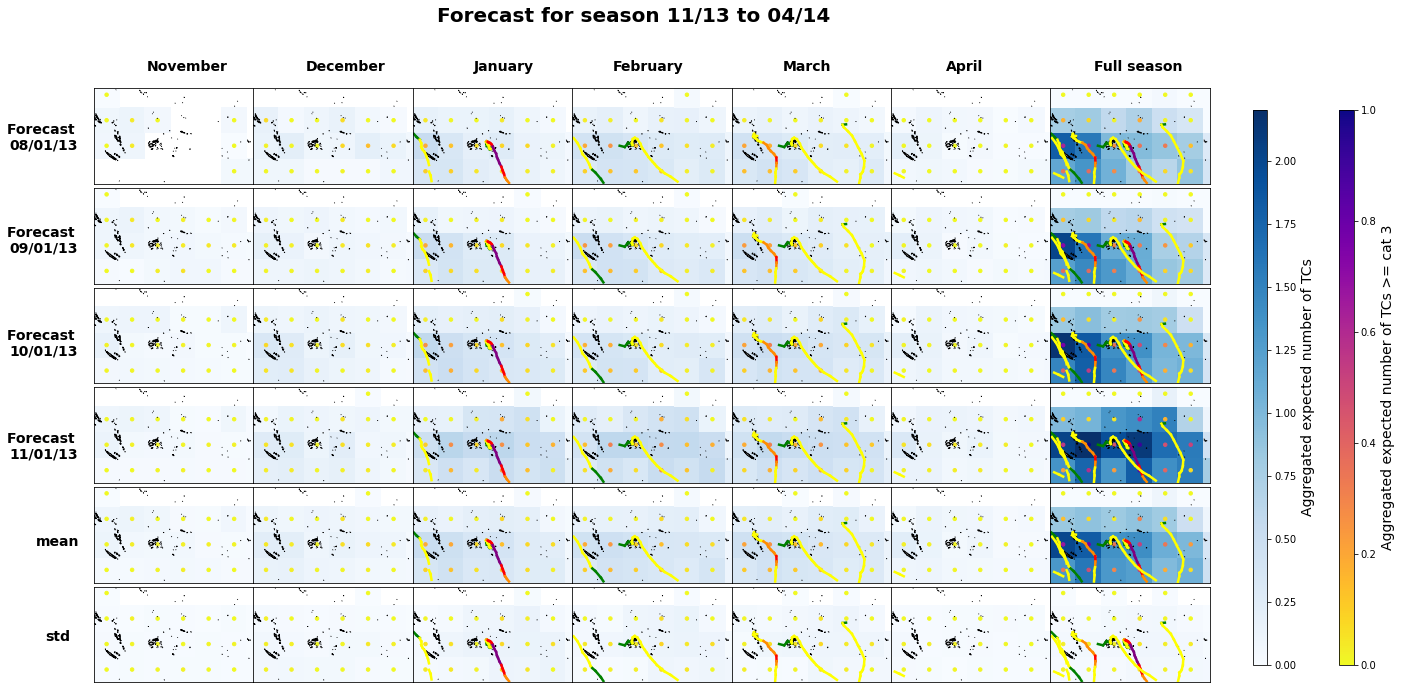

In [6]:
fig8_13_14 = plot_season(ds4,13,2013,2.2,1, mean_8, mean_8_c3, std_8, std_8_c3, mean_9, mean_9_c3, std_9, std_9_c3, mean_10, mean_10_c3, std_10, std_10_c3, mean_11, mean_11_c3, std_11, std_11_c3,lmean, lmean_c3,lstd,lstd_c3,mean_fs,mean_fs_c3,mean_mean,mean_mean_c3,std_mean,std_mean_c3,xds_timeM,12)

<br>
<br>

**SEASON 2015-2016 (El Niño event)**

In [4]:
path2 = path_f+'season_15_16/'
y = 2015
mean_8, mean_8_c3, std_8, std_8_c3, mean_9, mean_9_c3, std_9, std_9_c3, mean_10, mean_10_c3, std_10, std_10_c3, mean_11,mean_11_c3, std_11, std_11_c3,lmean, lmean_c3,lstd,lstd_c3,mean_fs,mean_fs_c3,mean_mean,mean_mean_c3,std_mean,std_mean_c3,ds4 = variables_plot_season(path2,y,5,8)

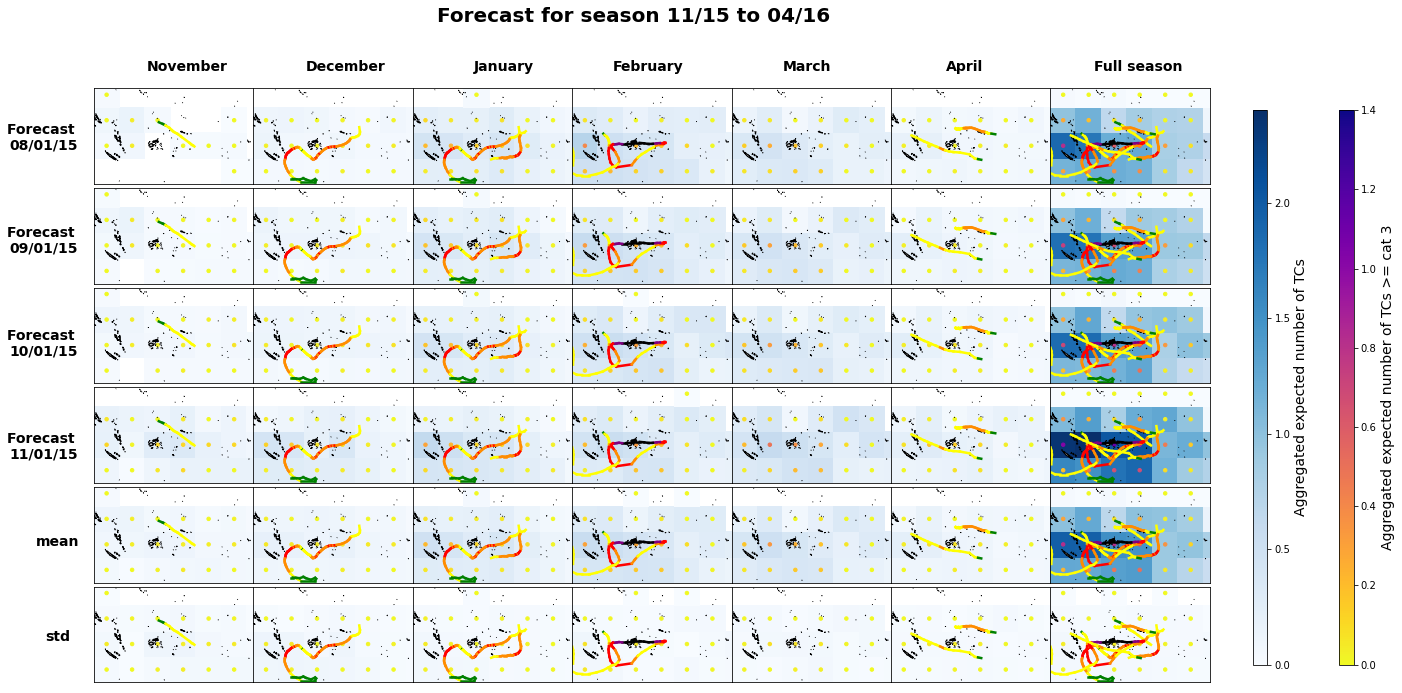

In [8]:
fig8_15_16 = plot_season(ds4,15,2015,2.4,1.4, mean_8, mean_8_c3, std_8, std_8_c3, mean_9, mean_9_c3, std_9, std_9_c3, mean_10, mean_10_c3, std_10, std_10_c3, mean_11, mean_11_c3, std_11, std_11_c3,lmean, lmean_c3,lstd,lstd_c3,mean_fs,mean_fs_c3,mean_mean,mean_mean_c3,std_mean,std_mean_c3,xds_timeM,12)

<br>
<br>

**FULL SEASONS**

In [9]:
seasons = [11,12,13,14,15,16,17,18]
list_fs, list_fs_c3,list_mfs,list_mfs_c3, list_stdfs, list_stdfs_c3 = variables_plot_season_means(path_f, seasons,5,8)

11
12
13
14
15
16
17
18


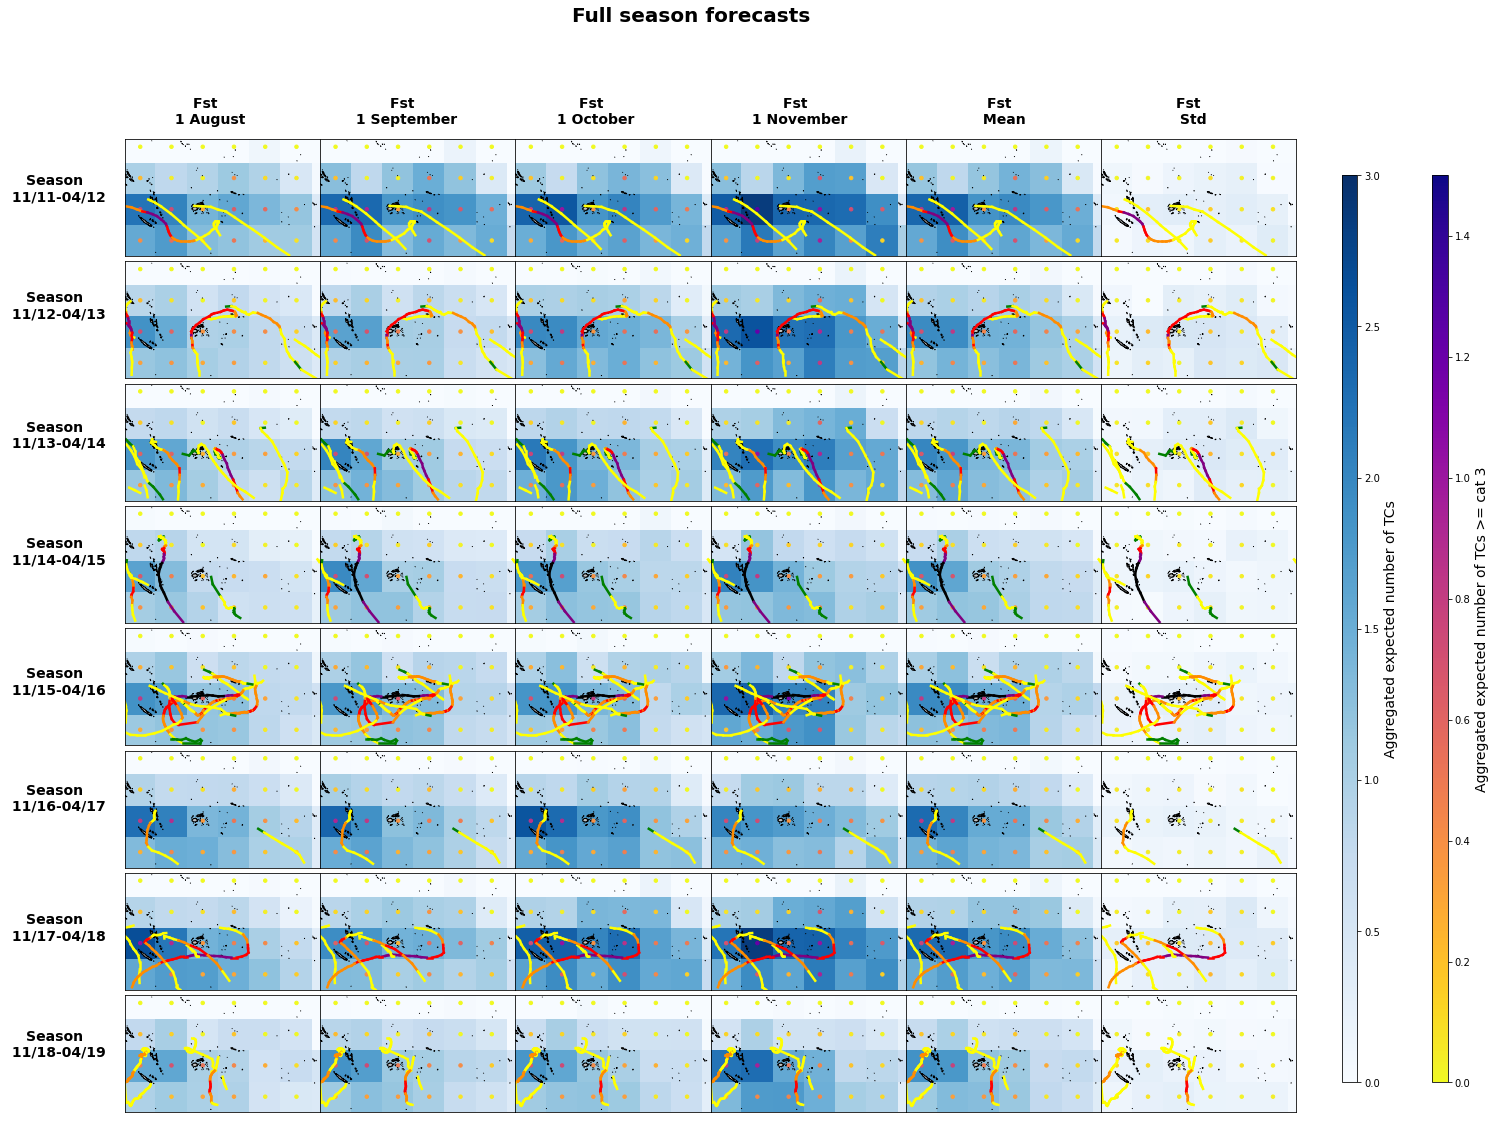

In [13]:
fig8_full_seasons = plot_season_means(ds4,3,1.5,list_fs, list_fs_c3,list_mfs,list_mfs_c3, list_stdfs, list_stdfs_c3,xds_timeM,12)

In [5]:
xds_timeline = ds_timeline(df,xs_dwt_counts,xs_dwt_counts_964,xds_kma)

<br>

**FORECAST vs MODEL DWTs probabilities**

In [7]:
#bmus from the calibration period of the methodology, from 01/1982 to 12/2019
ds_bmus = xr.Dataset({
    'bmus': (('time'), xds_kma.bmus.values),

},{
    'time': xds_kma.time.values,

})

print(ds_bmus)

<xarray.Dataset>
Dimensions:  (time: 13879)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    bmus     (time) int64 26 26 23 23 23 23 10 26 26 ... 24 24 24 24 24 24 24 24


In [8]:
s11,m11,std11,s12,m12,std12,s13,m13,std13,s14,m14,std14,s15,m15,std15,s16,m16,std16,s17,m17,std17,s18,m18,std18,s19,m19,std19,list_metm,list_smet = variables_dwt_forecast_plot(ds_bmus,2011,path_f+'season_')

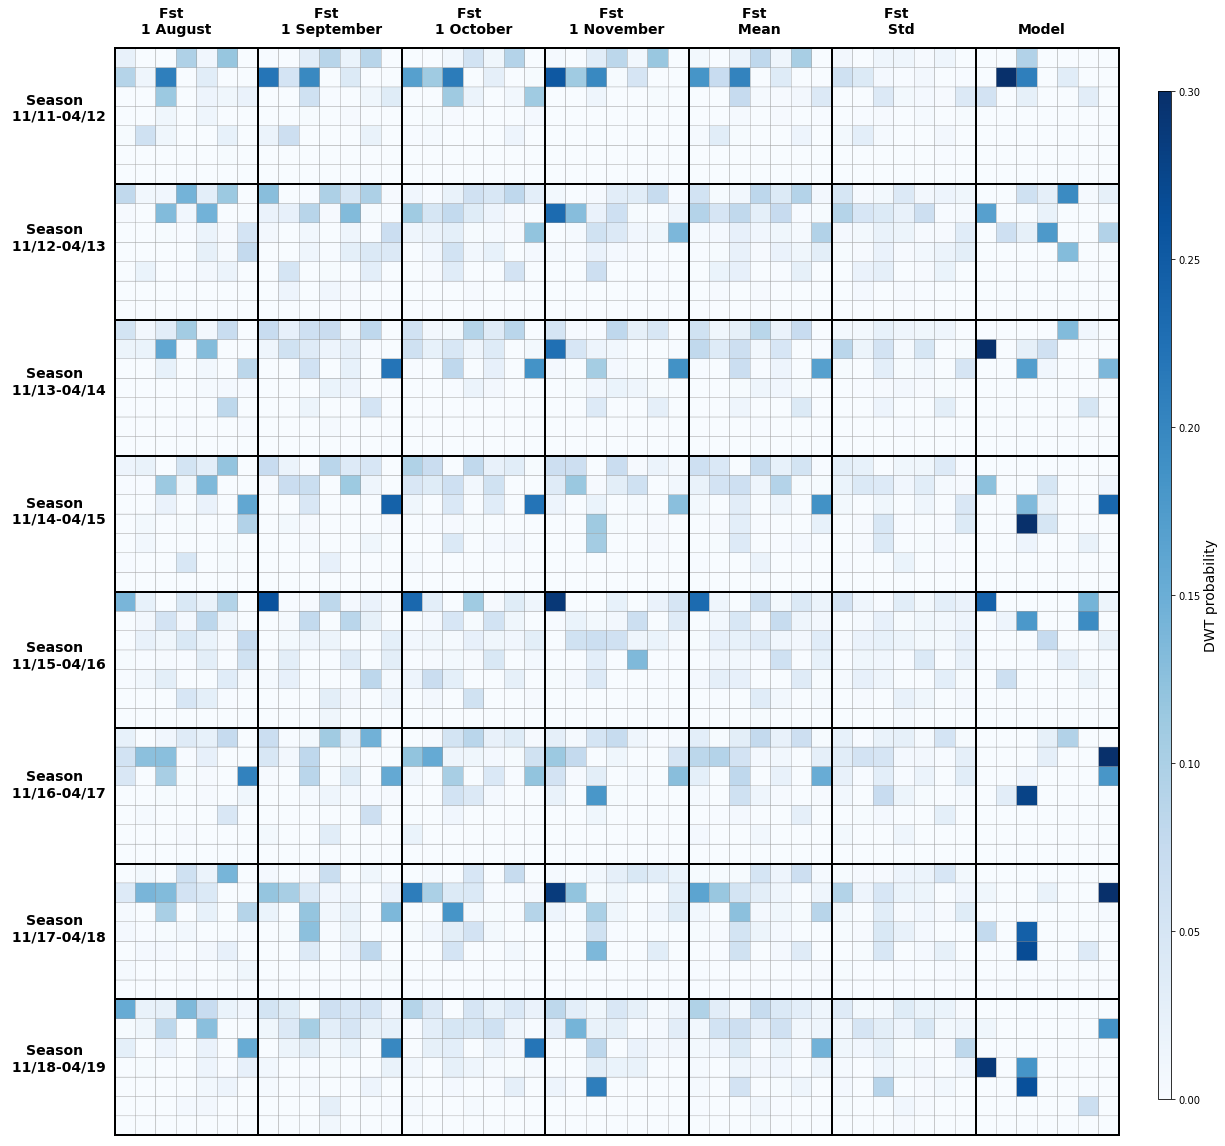

In [9]:
fig_dwt = dwt_forecast_plot(0.3,s11,m11,std11,s12,m12,std12,s13,m13,std13,s14,m14,std14,s15,m15,std15,s16,m16,std16,s17,m17,std17,s18,m18,std18,s19,m19,std19,list_metm,list_smet)

<br>
<br>

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">
    

**Recall:**
    
* The model performs very well when estimating the expected TC activity (number and intensity of TCs), not understimating the threat.    
* In some cells adjacents to the cells including TC tracks it overstimates TC activity.
    
<br>
    

**Forecast performance:**

* Much greater uncertainty -> DWTs probability is greatly shared and therefore more extended predictand maps.
* The weakness of the model are enhanced -> more extended (more overstimation in the sorroundings of the tracks) and more homogeneous maps.
* When there is an unsually high TC activity (Season 15-16) the forecast understimates it in the most active cells.
<br><br>


**<u> Conclusion</u>: Although the model has been proven to perform very well, the accuracy and reliability of the forecast greatly depends of the quality of the forecast data, which has also been proven to be quite improvable.**
    
</div>

<br />

## <font color='royalblue'>**Forecast application**</font> <a name="fapp"></a>

**Predictor data from the first day of April is downloaded and preprocessed, and the statistical model is applied to compute the TCs forecast from this day to next 9 months.**

In [5]:
#your path to the datasets containing the MLD and SST data
path = r'/media/administrador/SAMSUNG/seasonal_forecast/data/CFS/forecast_01_04_2021/'

#year and month of the forecast day
y = 2021
m = 4

In [7]:
process_day_with_file(path,path_p,y,m,xds_PCA,xs_dwt_counts,xs_dwt_counts_964)

Forecast month 4
Hour 0
Unique DWTs(array([ 1,  4,  5,  7, 11, 13, 16, 20, 22, 29, 33, 34, 35, 40, 41, 45, 46,
       47, 48, 49]), array([ 4, 16, 13, 21, 10, 19, 13,  8, 24, 25,  1, 19,  3, 11, 37,  8, 67,
        3,  4,  1]))
xds_timeline_M4_f1.nc
xs_M4_f1.nc
Hour 6
Unique DWTs(array([ 1,  4,  5,  7, 11, 13, 16, 29, 33, 34, 39, 41, 43, 44, 48, 49]), array([ 6, 20, 12, 13, 21, 53, 17,  1, 12, 34, 10,  5,  6,  1, 76, 20]))
xds_timeline_M4_f2.nc
xs_M4_f2.nc
Hour 12
Unique DWTs(array([ 1,  4,  5,  6, 11, 13, 16, 20, 22, 29, 34, 38, 39, 40, 41, 46, 47,
       48, 49]), array([ 3, 13, 19,  1, 14, 33, 15,  4,  6, 36, 19, 11,  7,  2, 16,  9,  2,
       96,  1]))
xds_timeline_M4_f3.nc
xs_M4_f3.nc
Hour 18
Unique DWTs(array([ 1,  4,  5,  7, 10, 11, 13, 16, 18, 20, 22, 25, 29, 32, 33, 34, 38,
       39, 41, 46, 48]), array([ 3, 24,  9,  4,  1,  2, 17, 10, 15,  7, 13,  1,  5, 19, 12, 40, 10,
        1, 15,  6, 92]))
xds_timeline_M4_f4.nc
xs_M4_f4.nc


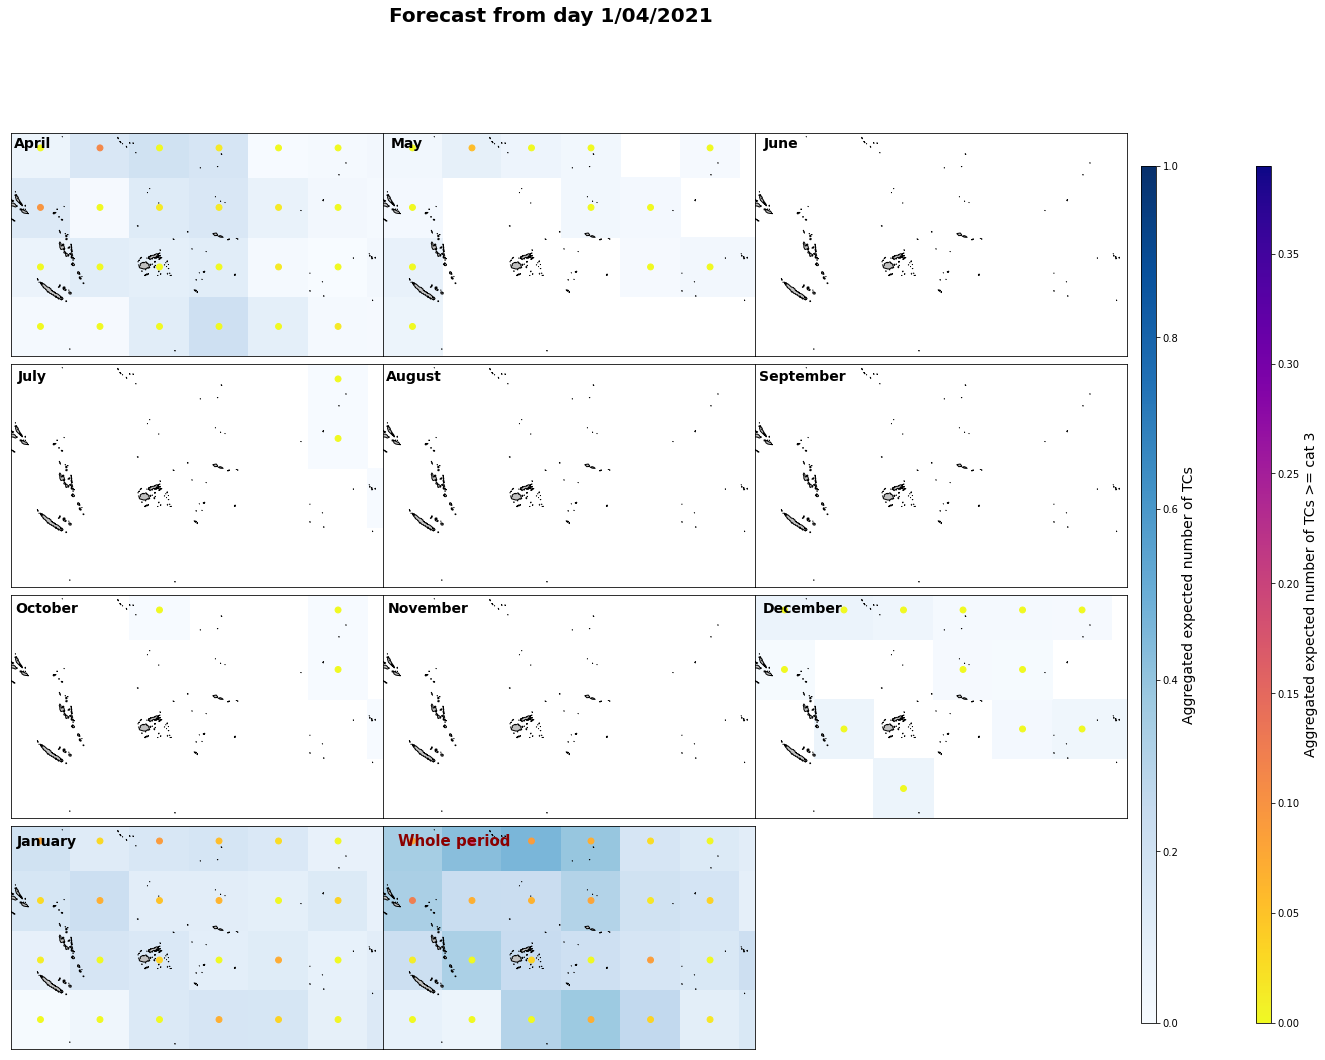

In [6]:
mean_day, mean_day_c3, mean_day_full_season,mean_day_full_season_c3,ds = variables_plot_forecast(path,2021,4,5,8)
fig8_f = plot_forecast(ds4,1,0.39,mean_day, mean_day_c3, mean_day_full_season,mean_day_full_season_c3,35)

<br />
<br />

## <font color='royalblue'>**Forecast outlook from different agencies**</font> <a name="look"></a>

<br />

In [1]:
from IPython.display import IFrame

<br>

<a href="https://www.met.gov.fj/index.php?page=climateOutlooks#Detailed_Outlook.pdf" target="_blank">**RMSC Nadi (Fiji Meteorological Service), SP>25ºS** </a> <br>
<br>

They generate TCs outlooks for the season, based in other seasons with similar patterns in the index NIÑO3.4.





There is a also a 5 days risk of cyclones outlook, consisting on maps.


They have as well maps of TC tracks prediction when there is TC activity at the moment.

In [2]:
IFrame('https://www.met.gov.fj/index.php?page=climateOutlooks#Detailed_Outlook.pdf',width=1300,height=450,embed = True)

<br>
<br>

<a href="https://www.metservice.com/warnings/tropical-cyclone-activity" target="_blank">**RMSC Wellington (Metservice) SP bellow 25ºS** </a> <br>
<br>

They generate a bulletin with the position and forecast of the TC track a few days ahead. They also and upload infrared satellite images of the last day.


In [3]:
IFrame('https://www.metservice.com/warnings/tropical-cyclone-activity',width=1000,height=450)

<br>
<br>

<a href="https://www.metoc.navy.mil/jtwc/jtwc.html" target="_blank">**Joint Typhoon Warning Center (JTWC)**</a> <br>
<br>
When there is an alert of TC they published it with downloadable information in text file about the position, maximum sustained winds (1-min), radius at 34/50/64kt and 12-hour and 24-hour forecasts. They also generate annual reports.  


<br><br>

<a href="https://www.gdacs.org/meteo.aspx?eventid=1000763&episodeid=12&eventtype=TC" target="_blank">**GDACS (Global Disaster Alert and Coordination System)**</a> <br>
<br> 
This is not an official center but it is a system developed to centralize warnings and estimates of the impacts of natural disasters (including TCs, using the bulletins issued by the RMSC, TCWC and JTWC). It can be interesting to have it there to consult, they have quite a few maps, it includes the alerts of the last year, but they seem to not be as updated as the other outlooks since the current alerts later.


<br><br>

<a href="https://www.ssd.noaa.gov/PS/TROP/TCFP/west_pacific.html" target="_blank">**48-hr Tropical Cyclone Formation Probability Guidance Product**</a> <br>
<br> 
The NOAA provides maps in the East and West Pacific with the current TC genesis probability and other interesting variables such as SST.


In [4]:
IFrame('https://www.ssd.noaa.gov/PS/TROP/TCFP/west_pacific.html',width=1000,height=450)